In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Multiclass y label generator.
def multi_categorize(y: float, classes: int):
    """
    Creates categorical labels from continuous values.

        Args:
            y (float):      continuous target variable (option return)
            classes (int):  number of classes to create
        Returns:
            (int):          class assignment
        CAREFUL: classes have to be between [0, C) for F.crossentropyloss.
    """
    if classes == 3:
        # thresholds: +/- 5%
        if y > 0.05:
            return 2
        elif y < -0.05:
            return 0
        else:
            return 1
    elif classes == 5:
        # thresholds: +/- 2.5% and +/- 5%
        if y > 0.05:
            return 4
        elif (y > 0.025 and y <= 0.05):
            return 3
        elif (y >= -0.05 and y < -0.025):
            return 1
        elif (y < -0.05):
            return 0
        else:
            return 2 # all returns \elin [-0.025, 0.025]
    else:
        raise ValueError("Only multi for 3 or 5 classes implemented right now.")

In [7]:
data = pd.read_parquet(Path(r"C:\Users\Mathiass\Documents\Projects\master-thesis\data")/"sp500_op_ret.parquet")

### WHOLE DATASET

In [12]:
y = data["option_ret"].apply(multi_categorize, classes=5)

<AxesSubplot:ylabel='Frequency'>

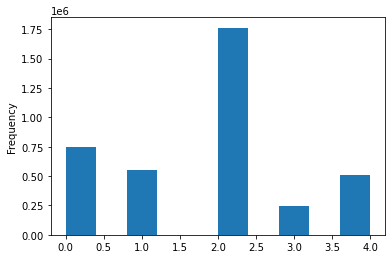

In [17]:
y.plot(kind="hist")

In [21]:
y.value_counts() / len(y) * 100

2    46.070807
0    19.543483
1    14.512208
4    13.392154
3     6.481349
Name: option_ret, dtype: float64

### ONLY TEST DATASET

In [28]:
y_testperiod = data[data["date"]>"2008"]["option_ret"].apply(multi_categorize, classes=5)

<AxesSubplot:ylabel='Frequency'>

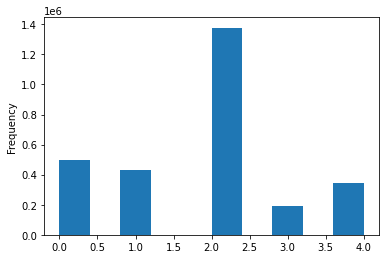

In [29]:
y_testperiod.plot(kind="hist")

In [32]:
y_testperiod.value_counts() / len(y_testperiod) * 100

2    48.482231
0    17.440872
1    15.063467
4    12.215017
3     6.798413
Name: option_ret, dtype: float64